In [1]:
import sympy
from sympy import S, Symbol, symbols, simplify, solve, diff,  plot_parametric, plot_implicit, Integral
from sympy import sin as Sin
from sympy import cos as Cos
from sympy import pi as Pi
%matplotlib inline

## Занятие 13
## Математический анализ
## Применение интегралов для вычисления площади поверхности тела вращения
### Площадь поверхности, образованной вращением вокруг оси ОХ
дуги гладкой кривой $y=f(x)$ между точками $x=a$ и $x=b$
$$
S_{OX}=2\pi\int\limits_a^b f(x)\sqrt{1+(f'(x))^2}\,dx
$$
### Пример 1
Вычислить площадь поверхности образованной вращением вокруг ОХ петли кривой $9y^2 = x(3 - x)^2$.

Изобразим график.

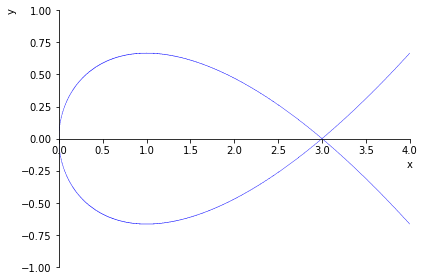

In [2]:
x = Symbol('x', positive=True)
y = Symbol('y')
Eq1 = sympy.Eq(9*y**2, x*(3 - x)**2)
plot_implicit(Eq1, (x, 0, 4), (y, -1, 1))

Выразим $y$ из уравнения, определяющего неявно заданную функцию:

In [3]:
y1 = solve(Eq1, y)[0]
display(y1)

sqrt(x)*(3 - x)/3

In [4]:
S_OX1 = 2*Pi*Integral(y1*(1 + y1.diff(x)**2)**S.Half, (x, 0, 3))
res1 = S_OX1.doit()
display(S_OX1, res1)

2*pi*Integral(sqrt(x)*(3 - x)*sqrt((-sqrt(x)/3 + (3 - x)/(6*sqrt(x)))**2 + 1)/3, (x, 0, 3))

-pi*(Integral(-3, (x, 0, 3)) + Integral(-2*x, (x, 0, 3)) + Integral(x**2, (x, 0, 3)))/3

Результат вычисления интеграла нужно упростить, пользуемся simplify. В случае применения simplify как метода не обязательно импортировать simplify из sympy.

In [5]:
res1.simplify()

3*pi

## Параметрически заданная кривая
Площадь поверхности, образованной вращением вокруг оси ОХ
дуги гладкой параметрически заданной кривой 
$$
\left\{
\begin{matrix}
x = \phi(t)\\
y = \psi(t)
\end{matrix}
\right.
$$ 
между точками $t=a$ и $t=b$ выражается формулой
$$
S_{OX}=2\pi\int\limits_a^b \phi(t)\sqrt{\phi'(t)^2+\psi'(t)^2}\,dt
$$
### Пример 2.
Вычислить площадь поверхности, образованной вращением  одной арки циклоиды 
$$
\left\{
\begin{matrix}
x = a(t - \sin t)\\
y = a(1 - \cos t)
\end{matrix}
\right.,\qquad a>0
$$ 
около оси ОХ.

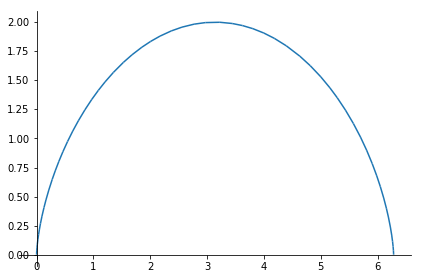

Integral(2*sqrt(2)*pi*a**2*(1 - cos(t))**(3/2), (t, 0, 2*pi))

In [6]:
t = Symbol('t')
a = Symbol('a', positive=True)
x2 = a*(t - Sin(t))
y2 = a*(1 - Cos(t))
plot_parametric(x2.subs(a, 1), y2.subs(a, 1), (t, 0, 2*Pi))
S_OX2 = Integral(2*Pi*(y2*(x2.diff(t)**2 + y2.diff(t)**2)**S.Half).simplify(), (t, 0, 2*Pi))
display(S_OX2)

sympy не удается вычислить этот интеграл, поэтому вручную проведем замену $1 - \cos(t) = 2\sin^2(t/2)$, замена осуществляется с помощью replace, это не замена переменной в интеграле, переменная остается все той же.

In [7]:
res = S_OX2.function.replace(1 - Cos(t), 2*Sin(t/2)**2)
display(sympy.Eq(S_OX2,res.integrate((t, 0, 2*Pi))))

Eq(Integral(2*sqrt(2)*pi*a**2*(1 - cos(t))**(3/2), (t, 0, 2*pi)), 64*pi*a**2/3)

## Поверхность тела вращения в полярной системе координат
Площадь поверхности тела, полученного при вращении сектора, ограниченного дугой кривой $r = F(\phi)$  и двумя полярными радиусами $\phi = \alpha$, $\phi = \beta$, вокруг полярной оси:
$$
S_\phi = 2\pi\int_\alpha^\beta r\sin\phi\sqrt{r^2 +(r')^2}\,d\phi.
$$
### Пример 3.
Вычислить площадь поверхности, образованной вращением кардиоиды $r=2a(1+\cos\phi)$ вокруг полярной оси.

Здесь применим simplify как функцию, в этом случае ее нужно импортировать из sympy или вызывать как sympy.simplify.

In [8]:
phi = Symbol('phi')
a = Symbol('a', positive=True)
r = 2*a*(1 + Cos(phi))
S_p = Integral(simplify(2*Pi*r*Sin(phi)*(r**2 + r.diff(phi)**2)**S.Half), (phi, 0, Pi))
display(sympy.Eq(S_p, S_p.doit()))

Eq(Integral(8*sqrt(2)*pi*a**2*(cos(phi) + 1)**(3/2)*sin(phi), (phi, 0, pi)), 128*pi*a**2/5)

### Площадь поверхности, образованной вращением вокруг оси ОY
дуги гладкой кривой $y = f(x)$ между точками $y = c$ и $y = d$
$$
S_{OY}=2\pi\int\limits_a^b x(y)\sqrt{1+(x'(y))^2}\,dy
$$
### Пример 4.
Найти площадь поверхности вращения астроиды 
$x^{2/3} + y^{2/3} = a^{2/3}$
вокруг оси OY.

Вначале выразим $x$ из уравнения с помощью solve:

In [9]:
a = Symbol('a', positive=True)
x, y = symbols('x y', real=True)
Eq4 = sympy.Eq(x**(S(2)/3) + y**(S(2)/3), a**(S(2)/3))
x1, x2 = solve(Eq4, x)
display(x1, x2)

-(a**(2/3) - y**(2/3))**(3/2)

(a**(2/3) - y**(2/3))**(3/2)

Для облегчения дальнейших вычислений раскроем скобки в подынтегральном выражении с помощью expand (применили как метод):

In [10]:
S_OY4 = 2*2*Pi*Integral((x2*(1 + x2.diff(y)**2)**S.Half).expand(), (y, 0, a))
S_OY4

4*pi*Integral(-a**(1/3)*y**(1/3)*sqrt(a**(2/3) - y**(2/3)) + a*sqrt(a**(2/3) - y**(2/3))/y**(1/3), (y, 0, a))

In [11]:
res4 = S_OY4.doit()
display(sympy.Eq(S_OY4, res4))

Eq(4*pi*Integral(-a**(1/3)*y**(1/3)*sqrt(a**(2/3) - y**(2/3)) + a*sqrt(a**(2/3) - y**(2/3))/y**(1/3), (y, 0, a)), 12*pi*a**2/5)

### Площадь поверхности, образованной вращением вокруг произвольной оси
При вычислении поверхности тела вращения относительно вертикальной оси $x = a$, образованного вращением дуги гладкой кривой $y = f(x)$ между точками $y = c$ и $y = d$, нужно из $x$ вычитать $a$ в интеграле:
$$
S_{x=a} = 2\pi\int\limits_a^b (a - x(y))\sqrt{1 + (x'(y))^2}\,dy
$$
### Пример 5.
Найти площадь поверхности, образованной вращением 
$y^2 = x$ вокруг оси $x = 1$. Заметим, что поверхность симметрична относительно оси OX, поэтому можно удвоить интеграл от 0 до 1, вместо интегрирования от $-1$ до 1.

In [12]:
y = Symbol('y', real=True)
x5 = y**2
S5 = 2*2*Pi*Integral(((1 - x5)*(1 + x5.diff(y)**2)**S.Half), (y, 0, 1))
display(sympy.Eq(S5, S5.doit()))

Eq(4*pi*Integral((1 - y**2)*sqrt(4*y**2 + 1), (y, 0, 1)), 4*pi*(17*asinh(2)/64 + 7*sqrt(5)/32))

### Пример 6.
Найти площадь поверхности, образованной вращением одной арки циклоиды
$$
\left\{
\begin{matrix}
x = a(t-\sin t)\\
y = a(1-\cos t)
\end{matrix}
\right.
$$
вокруг ее оси симметрии, график можно увидеть в Примере 2.

Поверхность образуется вращением левой половины дуги вокруг прямой $x = \pi a$. Принимая $y$ за независимую переменную и учитывая, что ось вращения сдвинута относительно координатной оси $OY$ на расстояние $\pi a$, имеем:
$$
S_{x = \pi a} = 2\pi\int\limits_0^\pi (\pi a - x(t))\sqrt{x'^2(t) + y'^2(t)}\,dt
$$

In [13]:
t = Symbol('t')
a = Symbol('a', positive=True)
x6 = a*(t - Sin(t))
y6 = a*(1 - Cos(t))
S6 = Integral(2*Pi*((Pi*a - x6)*(x6.diff(t)**2 + y6.diff(t)**2)**S.Half).simplify(), (t, 0, Pi))
display(S6)

Integral(2*pi*a**2*sqrt(2 - 2*cos(t))*(-t + sin(t) + pi), (t, 0, pi))

Укажем вручную, что $\sqrt{2 - 2\cos(t)} = 2\sin(t/2)$, используем replace

In [14]:
S7 = S6.replace((2 - 2*Cos(t))**S.Half, 2*Sin(t/2))
S7

Integral(4*pi*a**2*(-t + sin(t) + pi)*sin(t/2), (t, 0, pi))

In [15]:
display(sympy.Eq(S6, S7.doit()))

Eq(Integral(2*pi*a**2*sqrt(2 - 2*cos(t))*(-t + sin(t) + pi), (t, 0, pi)), -32*pi*a**2/3 + 8*pi**2*a**2)